In [42]:
import sync_wandb_run
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import utils as pu


# Filtering database

In [43]:
entity = "raphaelmaser"  # Your W&B username or team
project = "Improved-Interpretability-and-Concepts"  # Your W&B project name
df = sync_wandb_run.load_wandb_runs()
df.count()  # Display the number of runs loaded
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

val_accuracy = "Validation Accuracy"
grid_score = "PG Score"
frozen_layers = "config_define_frozen_layers"
trainable_layers = "Trainable (B=2) Layers"
figsize=(10,4)


In [44]:
layerwise_freezing = df[df['group'] == "layerwise-freezing-basemodel"]
layerwise_freezing = layerwise_freezing.query("name == 'B=1-pretrained-CE_B=2-classifier_frozen'")  # Filter runs by group
layerwise_freezing.reset_index(drop=True, inplace=True)  # Reset index after filtering
display(layerwise_freezing)  # Count the number of runs in this group
print(f"Number of runs in layerwise_freezing group: {len(layerwise_freezing)}")
layerwise_freezing.head()
for name in layerwise_freezing["name"].unique(): print(name)  # Print each model name

id                                     name     state        entity  \
0  6i4lt7p3  B=1-pretrained-CE_B=2-classifier_frozen  finished  raphaelmaser   
1  ruh1o3wr  B=1-pretrained-CE_B=2-classifier_frozen  finished  raphaelmaser   
2  kbhjyx2x  B=1-pretrained-CE_B=2-classifier_frozen  finished  raphaelmaser   
3  74sfwxz9  B=1-pretrained-CE_B=2-classifier_frozen  finished  raphaelmaser   
4  ssli0t2b  B=1-pretrained-CE_B=2-classifier_frozen  finished  raphaelmaser   
5  291h7pzs  B=1-pretrained-CE_B=2-classifier_frozen  finished  raphaelmaser   
6  8a1hmqc0  B=1-pretrained-CE_B=2-classifier_frozen  finished  raphaelmaser   

                                  project            created_at  updated_at  \
0  Improved-Interpretability-and-Concepts  2025-05-26T11:51:47Z         NaN   
1  Improved-Interpretability-and-Concepts  2025-05-26T11:51:49Z         NaN   
2  Improved-Interpretability-and-Concepts  2025-05-26T11:51:50Z         NaN   
3  Improved-Interpretability-and-Concepts  2025-05-26T11:51:50Z         NaN   
4  Improved-Interpretability-and-Concepts  2025-05-26T12:51:43Z         NaN   
5  Improved-Interpretability-and-Concepts  2025-05-26T11:51:50Z         NaN   
6  Improved-Interpretability-and-Concepts  2025-05-26T11:51:50Z         NaN   

  tags notes                                                url  \
0  NaN   NaN  https://wandb.ai/raphaelmaser/Improved-Interpr...   
1  NaN   NaN  https://wandb.ai/raphaelmaser/Improved-Interpr...   
2  NaN   NaN  https://wandb.ai/raphaelmaser/Improved-Interpr...   
3  NaN   NaN  https://wandb.ai/raphaelmaser/Improved-Interpr...   
4  NaN   NaN  https://wandb.ai/raphaelmaser/Improved-Interpr...   
5  NaN   NaN  https://wandb.ai/raphaelmaser/Improved-Interpr...   
6  NaN   NaN  https://wandb.ai/raphaelmaser/Improved-Interpr...   

                          group  job_type  sweep                   synced_at  \
0  layerwise-freezing-basemodel       NaN    NaN  2025-07-22T13:15:56.363304   
1  layerwise-freezing-basemodel       NaN    NaN  2025-07-22T13:15:57.309377   
2  layerwise-freezing-basemodel       NaN    NaN  2025-07-22T13:16:01.392994   
3  layerwise-freezing-basemodel       NaN    NaN  2025-07-22T13:15:58.303460   
4  layerwise-freezing-basemodel       NaN    NaN  2025-07-22T13:16:02.323394   
5  layerwise-freezing-basemodel       NaN    NaN  2025-07-22T13:16:00.480847   
6  layerwise-freezing-basemodel       NaN    NaN  2025-07-22T13:15:59.293695   

   final_trainer/global_step  final_MulticlassAccuracy_train  \
0                    20199.0                        0.878249   
1                    20199.0                        0.879858   
2                    20199.0                        0.888467   
3                    20199.0                        0.878535   
4                    20199.0                        0.884178   
5                    20199.0                        0.879494   
6                    20199.0                        0.879305   

   final_high_confidence_samples  \
0                            NaN   
1                            NaN   
2                            NaN   
3                            NaN   
4                            NaN   
5                            NaN   
6                            NaN   

   final_MulticlassAccuracy_val/dataloader_idx_0  \
0                                            NaN   
1                                            NaN   
2                                            NaN   
3                                            NaN   
4                                            NaN   
5                                            NaN   
6                                            NaN   

   final_val_contribution_score/dataloader_idx_0  final_train_time  \
0                                            NaN               NaN   
1                                            NaN               NaN   
2                                            NaN               NaN   
3                                            NaN          

Number of runs in layerwise_freezing group: 7
B=1-pretrained-CE_B=2-classifier_frozen


In [45]:
# # Method 1: Using .isin() - most common and readable
# baseline_ids = ["f1bjsf4y", "3g5nirfa", "sh8y0tee"]  # Add your actual IDs
# baseline_models = df[df['id'].isin(baseline_ids)]

# # Method 3: Using query() method - good for complex conditions
# # baseline_models = df.query("id == 'osmrd1gv' or id == 'another_id' or id == 'third_id'")

# print(f"Found {len(baseline_models)} baseline models")
# baseline_models

In [46]:
replace_dict = {"name": 
                  {
                        "EfficientBcosResNet50_B=1": "Bcos B=1", 
                        "EfficientBcosResNet50": "Bcos B=2", 
                        "EfficientBcosResNet50_B=1_CE": "Bcos B=1 CE", 
                        "B=1-pretrained-CE_B=2-adapter-layer_B=2-classifier_frozen": "Interleaved B=1 Model B=2 Adapters",
                        "B=2-pretrained_B=1-adapter-layer_B=1-classifier_frozen": "Interleaved B=2 Model B=1 Adapters"
                   }
                }
layerwise_freezing = pu.rename(layerwise_freezing).sort_values(by=frozen_layers, ascending=True)
layerwise_freezing = pu.add_trainable_layers_column(layerwise_freezing, frozen_layers_col=frozen_layers, new_col_name=trainable_layers)


# Plots

## Trainable layer position

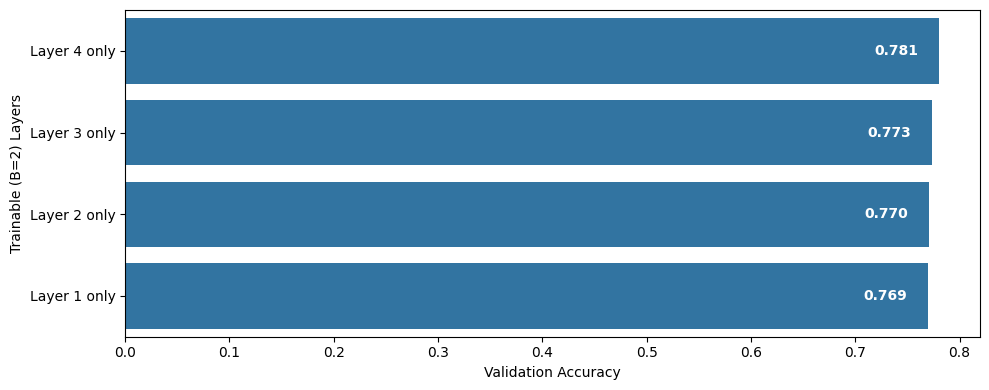

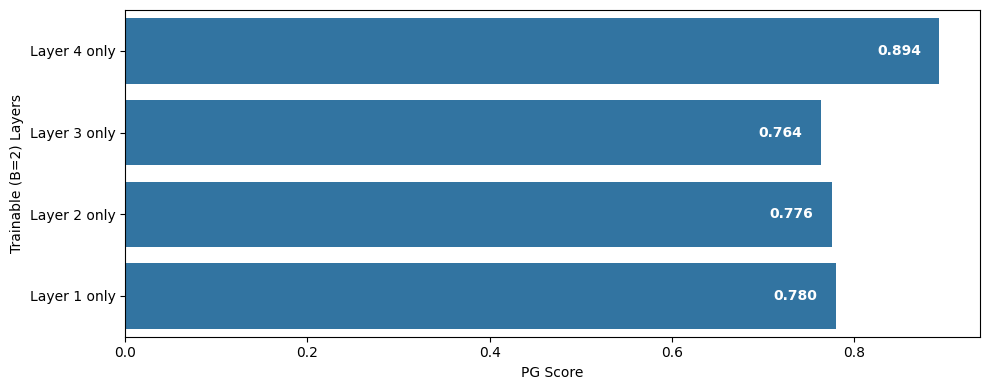

In [47]:
layerwise_freezing_multi = layerwise_freezing[layerwise_freezing[frozen_layers].isin([
    "['layer4']",
    "['layer3', 'layer4']",
    "[]",
])]
layerwise_freezing_single = layerwise_freezing[~layerwise_freezing["id"].isin(layerwise_freezing_multi["id"])]
layerwise_freezing_multi = pd.concat([layerwise_freezing_multi, layerwise_freezing_single[layerwise_freezing_single[frozen_layers] == "['layer2', 'layer3', 'layer4']"]])

plt.figure(figsize=figsize)
ax = sns.barplot(
    data=layerwise_freezing_single,
    y=trainable_layers,
    x=val_accuracy,
    # hue="config_enable_bottleneck_layers",  # Color points by name
    # s=100  # Make points larger
)
pu.add_val_to_plot(ax)

# Move legend outside the plot
plt.tight_layout()
plt.show()

plt.figure(figsize=figsize)
ax = sns.barplot(
    data=layerwise_freezing_single,
    y=trainable_layers,
    x=grid_score,
    # hue="config_enable_bottleneck_layers",  # Color points by name
    # s=100  # Make points larger
)
pu.add_val_to_plot(ax)

# Move legend outside the plot
plt.tight_layout()
plt.show()

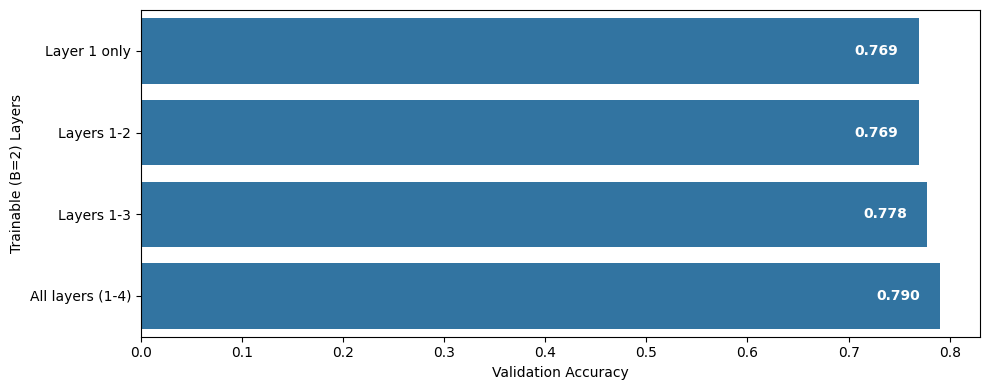

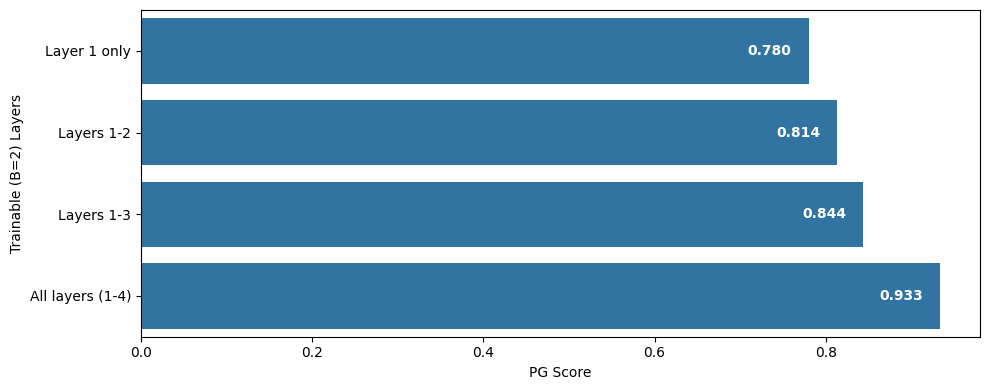

In [48]:
layerwise_freezing_multi = layerwise_freezing_multi.sort_values(by=frozen_layers, ascending=True)
plt.figure(figsize=figsize)
ax = sns.barplot(
    data=layerwise_freezing_multi,
    y=trainable_layers,
    x=val_accuracy,
    # hue="config_enable_bottleneck_layers",  # Color points by name
    # s=100  # Make points larger
)
pu.add_val_to_plot(ax)

# Move legend outside the plot
plt.tight_layout()
plt.show()

plt.figure(figsize=figsize)
ax = sns.barplot(
    data=layerwise_freezing_multi,
    y=trainable_layers,
    x=grid_score,
    # hue="config_enable_bottleneck_layers",  # Color points by name
    # s=100  # Make points larger
)
pu.add_val_to_plot(ax)

# Move legend outside the plot
plt.tight_layout()
plt.show()